In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [17]:
# load the dataset 
df = pd.read_csv('admission_data.csv')

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.shape

(500, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
# seperate Input features and target feature. 
X = df.iloc[ : , 0 : 7]
y = df.iloc[ : , -1]

In [23]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [24]:
X.shape

(500, 7)

In [25]:
# we have known the values range for all columns so we will use Min-Max Scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]], shape=(500, 7))

In [27]:
y.shape

(500,)

In [28]:
# do the train-test split 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.1 , random_state = 42)

In [29]:
X_train.shape

(450, 7)

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(units = 7 , activation = 'relu' , input_dim = X_train.shape[1])) # input layer
model.add(Dense(units = 10 , activation = 'relu')) # hidden layer
model.add(Dense(units = 1 , activation = 'linear')) # output layer => for regression, activation function is always linear

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss = 'mean_squared_error' , optimizer = 'Adam')

In [36]:
history = model.fit(X_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2038 - val_loss: 0.1352
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0898 - val_loss: 0.0416
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0307 - val_loss: 0.0166
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - val_loss: 0.0173
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0203 - val_loss: 0.0146
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0176 - val_loss: 0.0130
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - val_loss: 0.0118
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0147 - val_loss: 0.0107
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0135 - val_loss: 0.0097
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0124 - val_loss: 0.0089


In [37]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [38]:
from sklearn.metrics import r2_score

r2_score(y_test , y_pred)

0.5593180849065258

In [49]:
model1 = Sequential()

model1.add(Dense(units = 7 , activation = 'relu' , input_dim = X_train.shape[1])) # input layer
model1.add(Dense(units = 10 , activation = 'relu')) # hidden layer
model1.add(Dense(units = 1 , activation = 'linear')) # output layer => for regression, activation function is always linear

In [50]:
model1.compile(loss = 'mean_squared_error' , optimizer = 'Adam' , metrics = ['mse'])

In [51]:
history = model1.fit(X_train , y_train , epochs = 100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4783 - mse: 0.4783
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2738 - mse: 0.2738 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1452 - mse: 0.1452 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0775 - mse: 0.0775 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0495 - mse: 0.0495 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0413 - mse: 0.0413 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0382 - mse: 0.0382 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0358 - mse: 0.0358 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0334 - mse: 0.0334 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - mse: 0.0312 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0289 - mse: 0.0289 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268 - mse: 0.0268 
Epoch 13/100
15/15 ━━━━━━━

In [45]:
y_pred1 = model1.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [52]:
r2_score(y_test , y_pred1)

0.7929317978858006

In [53]:
history.history.keys()

dict_keys(['loss', 'mse'])

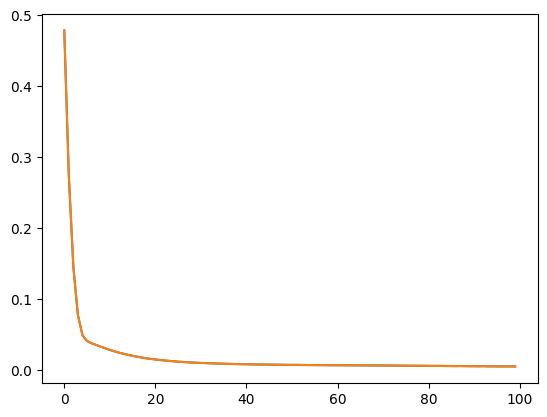

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.show()